# data

In [1]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.1 MB/s eta 0:00:00


In [2]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv

--2023-10-27 13:30:58--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/translate_tamil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13105123 (12M) [text/plain]
Saving to: ‘translate_tamil.csv’

translate_tamil.csv 100%[===================>]  12.50M  --.-KB/s    in 0.1s    

2023-10-27 13:30:59 (104 MB/s) - ‘translate_tamil.csv’ saved [13105123/13105123]



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
data = pd.read_csv('/content/translate_tamil.csv')

In [4]:
data

,Unnamed: 0,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish,translate
0,0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...
2,2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...
3,3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...
...,...,...,...,...,...,...,...,...,...
38209,38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True,Yov padam vera lvl la ஹிட் ஆக போகுது
38210,38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...
38211,38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..
38212,38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா


In [5]:
data.rename(columns={'category':'label_text'}, inplace=True)
data['label_text'].value_counts()

NOT    28833
OFF     9381
Name: label_text, dtype: int64

In [6]:
labels=data['label_text']
unique_labels = data['label_text'].unique()
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}

# Convert labels to numerical values
data['lable'] = [label2id[label] for label in data['label_text']]
print(label2id)
print(id2label)

{'NOT': 0, 'OFF': 1}
{0: 'NOT', 1: 'OFF'}


In [7]:
data

,Unnamed: 0,text,label_text,Length,Word_count,mean_word_length,mean_sent_length,isenglish,translate,lable
0,0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,0
1,1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,1
2,2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,1
3,3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,0
4,4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,0
...,...,...,...,...,...,...,...,...,...,...
38209,38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True,Yov padam vera lvl la ஹிட் ஆக போகுது,0
38210,38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True,காத்திருப்பது போல் அதிர்ந்த சூப்பர் ஸ்டார் ரசி...,0
38211,38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True,ஹிந்தி படம் ஏக் தா டைகர் ரீமேக்..,1
38212,38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True,அபா இதுல்லா எஸ்.கே வான் யாரும் இலையாடா,1


In [8]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score ,roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import itertools
import time

In [9]:
print(torch.cuda.is_available())

True


In [10]:
model_name= "bert-base-multilingual-uncased"
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=unique_labels.size,label2id=label2id,id2label=id2label)
# Adjust num_labels based on your classes


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
X_train, X_test,y_train, y_test= train_test_split(data['translate'],data['lable'],test_size=0.2, random_state=42)

In [12]:
max_length = 128  # Adjust as needed

X_train_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True) for text in X_train]
X_test_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True) for text in X_test]

# Convert data to PyTorch tensors
X_train_encoded = torch.tensor(X_train_encoded)
y_train = torch.tensor(y_train.to_list())
X_test_encoded = torch.tensor(X_test_encoded)
y_test = torch.tensor(y_test.to_list())

# Oversample the minority class using SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded.numpy(), y_train.numpy())  # Convert to NumPy

# # Convert the resampled data back to PyTorch tensors
# X_train_resampled = torch.tensor(X_train_resampled)
# y_train_resampled = torch.tensor(y_train_resampled)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [13]:
model.to('cuda')
X_train_resampled = X_train_encoded.to('cuda')
y_train_resampled = y_train.to('cuda')


In [14]:

# Define the BERT model for sequence classification

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Create DataLoader objects
train_dataset = TensorDataset(X_train_resampled, y_train_resampled)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3:   0%|          | 0/956 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/3, Train Loss: 0.4694, Train Accuracy: 0.7777, ROC AUC: 0.7603, Time: 664.40


Epoch 2/3, Train Loss: 0.3767, Train Accuracy: 0.8224, ROC AUC: 0.8670, Time: 662.17


Epoch 3/3, Train Loss: 0.3244, Train Accuracy: 0.8510, ROC AUC: 0.9059, Time: 662.33


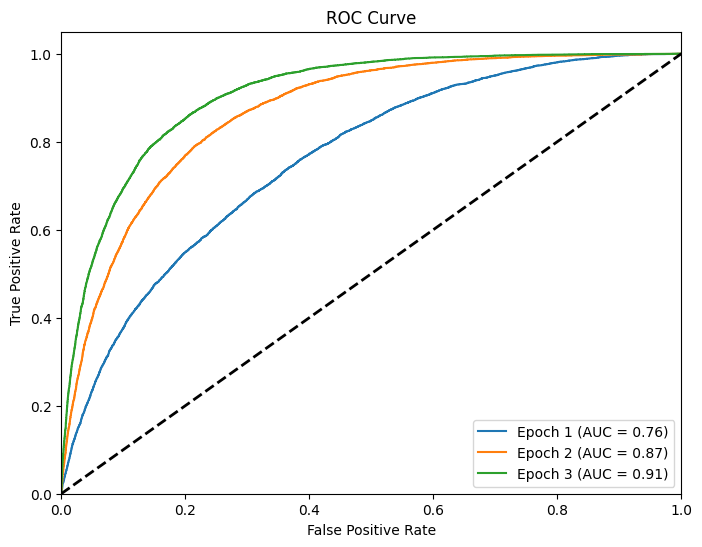

In [15]:
num_epochs = 3
# Create empty lists to store ROC data for each epoch
fpr_list = []
tpr_list = []
roc_auc_list = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    true_labels = []
    predicted_scores = []

    # Create a tqdm progress bar
    pbar = tqdm(train_dataloader, leave=False, desc=f'Epoch {epoch+1}/{num_epochs}')

    for batch in pbar:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        true_labels.extend(labels.cpu().numpy())
        predicted_scores.extend(outputs.logits[:, 1].cpu().detach().numpy())

        # Update the progress bar
        pbar.set_postfix(loss=total_loss / (total_samples + 1e-7), accuracy=correct_predictions / total_samples)

    average_train_loss = total_loss / len(train_dataloader)
    train_accuracy = correct_predictions / total_samples
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Calculate ROC data
    fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    # Print ROC AUC for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, ROC AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}")

# Plot ROC curves for each epoch
plt.figure(figsize=(8, 6))
for epoch in range(num_epochs):
    plt.plot(fpr_list[epoch], tpr_list[epoch], label=f'Epoch {epoch+1} (AUC = {roc_auc_list[epoch]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [16]:
model.eval()
y_pred = []
with torch.no_grad():
    for batch in tqdm(DataLoader(X_test_encoded, batch_size=32), leave=False, desc='Testing'):
        inputs = batch.to('cuda')
        logits = model(inputs).logits
        _, predicted = torch.max(logits, 1)
        y_pred.extend(predicted.cpu().numpy())

print("")
print(classification_report(y_test.numpy(), y_pred))
print(f"Kappa value {cohen_kappa_score(y_test.numpy(), y_pred):.2f}")
print(f"Confuction matrix{confusion_matrix(y_test.numpy(), y_pred)}")



              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5734
           1       0.70      0.53      0.60      1909

    accuracy                           0.83      7643
   macro avg       0.78      0.73      0.75      7643
weighted avg       0.82      0.83      0.82      7643

Kappa value 0.49
Confuction matrix[[5297  437]
 [ 898 1011]]


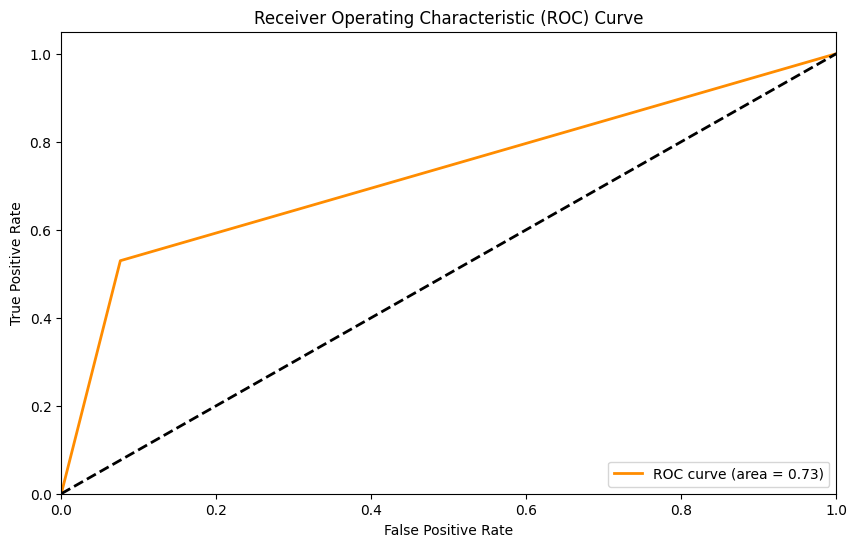

In [17]:
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_pred)
roc_auc = roc_auc_score(y_test.numpy(), y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
